# Ecommerce data

## Background: 
I am pretending to be working on a contract for an Ecommerce company based in New York City. Their business model is that they provide in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. I have been hired to help them figure it out! 

Note: This is artificial data. 

## Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Get the Data

CSV file titled 'Ecommerce Customers' provided. 
Categorical/text information includes: Email, Address, and their color Avatar. 

I will focus on the numerical value columns:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
df = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Since we only have 5 columns of interest, let's look at all of them to determine which are the strongest correlations**

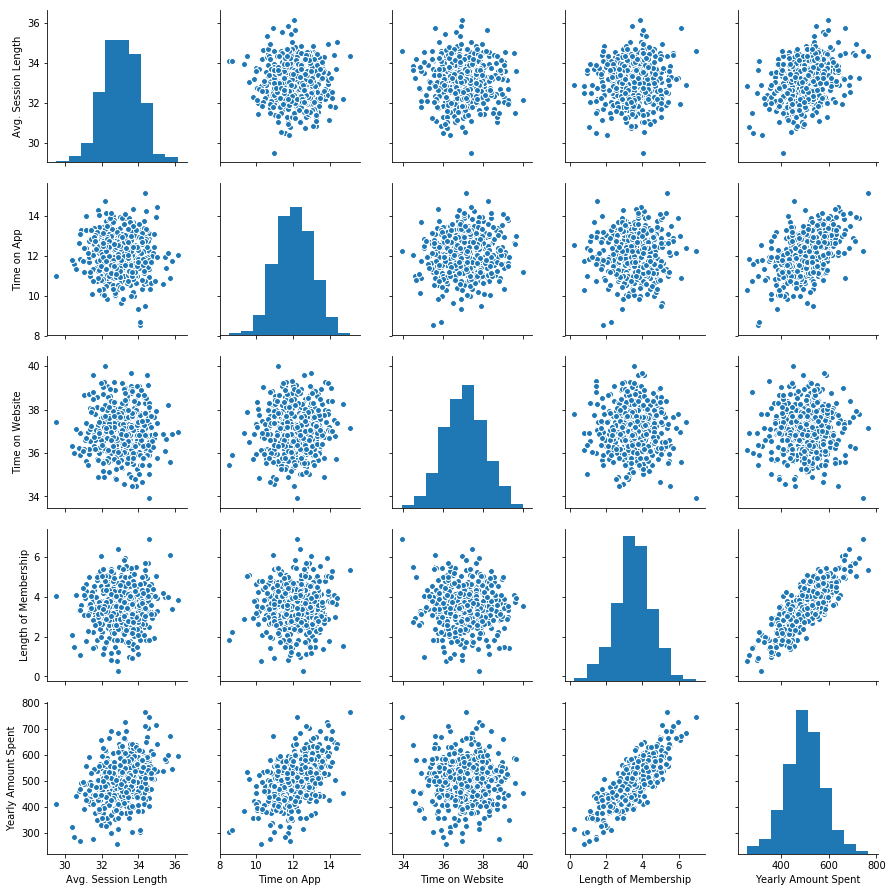

In [10]:
sns.pairplot(df)

**It looks like the highest correlation related to yearly amount spent is length of membership** 

There is also a slight correlation between yearly amount spent and the time on app. 

Why might there not be a correlation between yearly amount spent and time on website? 
- perhaps shoppers only go to the website when they know what they want to buy and thus do not spend a lot of time browsing. 
- it would be interesting to compare the total time spent in-store, on the app, and on the website and see if the total time shopping correlated to yearly amount spent. 

**Taking a closer look at Yearly Amoutn Spent vs Lenght of Membership **

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


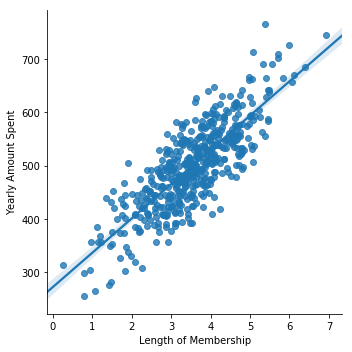

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

** That is a pretty strong correlation with low standard deviations. This seems like a good fit for the linear regression model. However, I will just check that the distribution is standard before proceeding.**

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


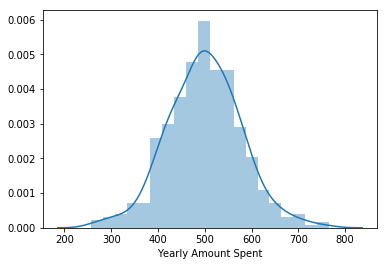

In [6]:
sns.distplot(df['Yearly Amount Spent'])

## Train/Test Split 

Distribution looks normal, so  I will split the data into a training and testing set. 

In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
# disregarding text features: Email, Address, Avatar, 
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = df['Yearly Amount Spent']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

## Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

# create an instance of a LinearRegression model 
lm = LinearRegression()

# train the model on the training set
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [21]:
# Use a dataframe so it's easier to read 
df_coef = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
df_coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data

In [12]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted values')

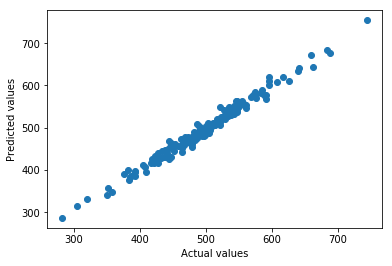

In [14]:
# Visualize predictions vs actual values through a scatterplot 
plt.scatter(Y_test,predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

** The model looks like it did well!** 

## Mathematically Evaluating the Model
** Calculate the Mean Absolute Error, Mean Squared Error, the Root Mean Squared Error, and the Explained Variance Score (R^2). **

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R^2:', metrics.explained_variance_score(Y_test,predictions))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656
R^2: 0.9890771231889606


## Residuals
**Plot a histogram of the residuals and make sure it looks normally distributed.**

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


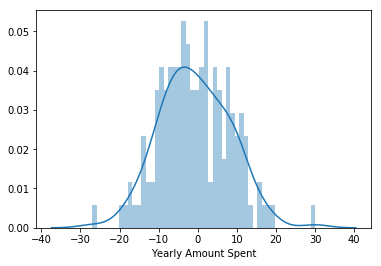

In [26]:
sns.distplot((Y_test-predictions),bins=50)

## Conclusion
So, should the company focus on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. 

In [16]:
df_coef = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
df_coef.sort_values(by='Coefficient')

,Coefficient
Time on Website,0.067310
Avg. Session Length,26.225342
Time on App,38.741928
Length of Membership,61.572906


**Interpretation of coefficients:**
* 1 unit of increase in length of membership = $61 more per year 

* 1 unit of increase in time on app = $38 more per year

* 1 unit of increase in time on website = $0.19 more per year

* 1 unit of increase in avg session length = $26 more per year

**I would recommend that they work on incentive programs to keep customers as members for longer since it has the most return on investment.**

However, if choosing between website and app, I would initially recommend that they focus on the app. This would be for the same reason as above - better return on investment. 

That said, there is significant room for improvement on their web experience. More information regarding the business model, resources available, and cost of these improvements is needed to make a fully informed decision. 